In [2]:
import pandas as pd 
import numpy as np
from pandas import Series,DataFrame

## 5.1.1 处理缺失值

### 1．侦查缺失值

### 通过人工查看DataFrame数据是否有缺失值的方法是很低效的。尤其当数据量大时，人工查看很耗时间。通过isnull和notnull方法，可以返回布尔值的对象

In [3]:
df1 = DataFrame([[3,5,3],[1,6,np.nan],['lili',np.nan,'pop'],[np.nan,'a','b']])
df1

,0,1,2
0,3,5,3
1,1,6,NaN
2,lili,NaN,pop
3,NaN,a,b


In [4]:
df1.isnull()   #true为缺失值

,0,1,2
0,False,False,False
1,False,False,True
2,False,True,False
3,True,False,False


In [5]:
df1.notnull()

,0,1,2
0,True,True,True
1,True,True,False
2,True,False,True
3,False,True,True


### 这时通过求和可以获取每列的缺失值数量，再通过求和就可以获取整个DataFrame的缺失值数量

In [6]:
df1.isnull().sum()

0    1
1    1
2    1
dtype: int64

In [8]:
df1.isnull().sum().sum()

3

### 通过info方法，也可以看出DataFrame每列数据的缺失值情况

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
0    3 non-null object
1    3 non-null object
2    3 non-null object
dtypes: object(3)
memory usage: 224.0+ bytes


### 2．删除缺失值

### 在缺失值的处理方法中，删除缺失值是常用的方法之一。通过dropna方法可以删除具有缺失值的行

In [10]:
df1.dropna()

,0,1,2
0,3,5,3


### 传入how='all'，则只会删除全为NaN的那些行

In [11]:
df1.dropna(how='all')

,0,1,2
0,3,5,3
1,1,6,NaN
2,lili,NaN,pop
3,NaN,a,b


In [12]:
df2 = DataFrame(np.arange(12).reshape(3,4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [14]:
df2.ix[2,:] = np.nan
df2[3] = np.nan
df2

C:\Users\aaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [15]:
df2.dropna(how='all')

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN


### 如果需要删除列，则指定轴方向即可

In [16]:
df2.dropna(how='all',axis=1)

,0,1,2
0,0.0,1.0,2.0
1,4.0,5.0,6.0
2,NaN,NaN,NaN


### 3．填充缺失值

### 当数据量不够或许其他部分信息很重要的时候，就不能删除数据了，这时就需要对缺失值进行填充。通过fillna方法可以将缺失值替换为常数值

In [17]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [18]:
df2.fillna(0)

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,0.0,0.0,0.0,0.0


### 在fillna中传入字典结构数据，可以针对不同列填充不同的值，fillna返回的是新对象，不会对原数据进行修改，可通过inplace就地进行修改

In [19]:
df2.fillna({1:6,3:0})

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [20]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [21]:
df2.fillna({1:6,3:0},inplace=True)
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


### 对重新索引（reindex）中填充缺失值的方法同样适用于fillna中

In [22]:
df2.fillna(method='ffill')

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,4.0,6.0,6.0,0.0


### 通过平均值等作为填充数

In [24]:
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [26]:
df2[0] = df2[0].fillna(df2[0].mean())
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,2.0,6.0,NaN,0.0


### 对于fillna的参数，可以通过“? ”进行帮助查询，这也是自我学习最好的方法

In [27]:
df2.fillna?

## 5.1.2 移除重复数据

### 在爬取的数据中往往会出现重复数据，对于重复数据保留一份即可，其余的可做移除处理。在DataFrame中，通过duplicated方法判断各行是否有重复数据

In [28]:
data = {
    'name':['张三','李四','张三','小明'],
    'sex':['female','male','female','male'],
    'year':[2001,2002,2001,2002],
    'city':['北京','上海','北京','北京']
}
df1 = DataFrame(data)
df1

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2002,上海
2,张三,female,2001,北京
3,小明,male,2002,北京


In [29]:
df1.duplicated()

0    False
1    False
2     True
3    False
dtype: bool

### 通过drop_duplicates方法，可以删除多余的重复项

In [30]:
df1.drop_duplicates()

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2002,上海
3,小明,male,2002,北京


### 在这种情况下，当每行的每个字段都相同时才会判断为重复项。当然，也可以通过指定部分列作为判断重复项的依据

In [31]:
df1.drop_duplicates(['sex','year'])

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2002,上海


### 通过结果可看出，保留的数据为第一个出现的组合。传入keep='last’可以保留最后一个出现的组合

In [33]:
df1.drop_duplicates(['sex','year'],keep='last')

,name,sex,year,city
2,张三,female,2001,北京
3,小明,male,2002,北京


## 5.1.3 替换值

### 替换值类似于Excel中的替换功能，是对查询到的数据替换为相应的数据。在pandas中，通过replace可完成替换值的功能

In [36]:
data = {
    'name':['张三','李四','王五','小明'],
    'sex':['female','male','','male'],
    'year':[2001,2003,2001,2002],
    'city':['北京','上海','','北京']
}
df1 = DataFrame(data)
df1

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2003,上海
2,王五,,2001,
3,小明,male,2002,北京


In [37]:
df1.replace({'':'不详',2001:2002})

,name,sex,year,city
0,张三,female,2002,北京
1,李四,male,2003,上海
2,王五,不详,2002,不详
3,小明,male,2002,北京


## 5.1.4 利用函数或映射进行数据转换

### 某个班级学生的数学成绩表，我们定义一个等级情况：分数在90～100之间为优秀；分数在70～89之间为良好；分数在60～69之间为合格，分数低于60分为不合格。在Excel中，通过if函数去实现分数等级的划分，在pandas中定义好函数，通过map方法也可以实现同样的效果

In [38]:
data = {
    'name':['张三','李四','王五','小明'],
    'math':[79,53,63,92]}
df2 = DataFrame(data)
df2

,name,math
0,张三,79
1,李四,53
2,王五,63
3,小明,92


In [39]:
def f(x):
    if x >= 90:
        return '优秀'
    elif 70<=x<90:
        return '良好'
    elif 60<=x<70:
        return '合格'
    else:
        return '不合格'

In [40]:
df2['class'] = df2['math'].map(f)
df2

,name,math,class
0,张三,79,良好
1,李四,53,不合格
2,王五,63,合格
3,小明,92,优秀


### 注意：对于一列数据的转换，也可以通过apply函数来实现。

## 5.1.5 检测异常值

### 设备故障和人为操作失误都会产生异常值，在数据分析中，通常会通过一些可视化的方法去找离群点，这些离群点可能就是异常值。但初学者一定要注意：并非所有的离群点都是异常值，需要根据业务常识等辅助经验进行判断。

In [41]:
df3 = DataFrame(np.arange(10),columns=['x'])
df3['y'] = 2*df3['x']+0.5
df3.iloc[9,1] = 185
df3

,x,y
0,0,0.5
1,1,2.5
2,2,4.5
3,3,6.5
4,4,8.5
5,5,10.5
6,6,12.5
7,7,14.5
8,8,16.5
9,9,185.0


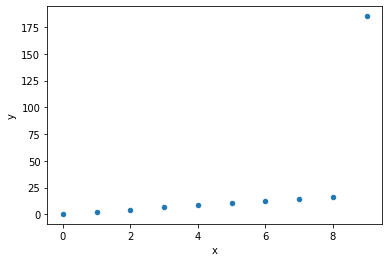

In [49]:
df3.plot.scatter(x='x',y='y')

## 5.1.6 虚拟变量

### 在数学建模和机器学习中，只有数值型数据才能供算法使用，对于一些分类变量则需要将其转换为虚拟变量（哑变量）（也就是0,1矩阵），通过get_dumnies函数即可实现该功能

In [54]:
df = DataFrame({
    '朝向':['东','南','东','西','北'],
    '价格':[1200,2100,2300,2900,1400]
})
df

,朝向,价格
0,东,1200
1,南,2100
2,东,2300
3,西,2900
4,北,1400


In [55]:
pd.get_dummies(df['朝向'])

,东,北,南,西
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


### 对于多类别的数据而言，需要通过apply函数来实现。

In [56]:
df2 = DataFrame({
    '朝向':['东/北','西/南','东','西/北','北'],
    '价格':[1200,2100,2300,2900,1400]
})
df2

,朝向,价格
0,东/北,1200
1,西/南,2100
2,东,2300
3,西/北,2900
4,北,1400


In [57]:
dummies = df2['朝向'].apply(lambda x :Series(x.split('/')).value_counts())
dummies

,东,北,西,南
0,1.0,1.0,NaN,NaN
1,NaN,NaN,1.0,1.0
2,1.0,NaN,NaN,NaN
3,NaN,1.0,1.0,NaN
4,NaN,1.0,NaN,NaN


In [58]:
dummies = dummies.fillna(0).astype(int)
dummies

,东,北,西,南
0,1,1,0,0
1,0,0,1,1
2,1,0,0,0
3,0,1,1,0
4,0,1,0,0
